<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/24%20-%20Sklearn%20%3A%20Apprentissage%20Non-supervis%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24/30 Apprentissage Non-Supervisé

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## 1. K-Means Clustering

In [2]:
from sklearn.cluster import KMeans

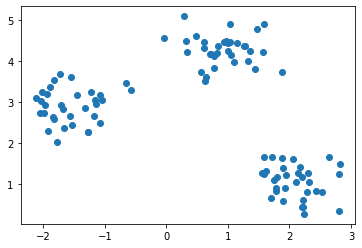

In [3]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

# Modélisation

## Kmeans

In [4]:
# création du modèle
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(X)

KMeans(n_clusters=3)

In [7]:
# Evaluation
print(model_kmeans.score(X))
model_kmeans.inertia_

-30.870531280140675


30.87053128014067

In [8]:
#Création des clusters/classes sur la base train
clusters_kmeans = model_kmeans.predict(X)

clusters_kmeans


array([0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1,
       1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0,
       1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2])

In [9]:
import pandas as pd

clusters_kmeans1 = pd.DataFrame({'clusters':clusters_kmeans})
clusters_kmeans1['clusters'].value_counts()



1    34
2    33
0    33
Name: clusters, dtype: int64

In [10]:
clusters_kmeans1

,clusters
0,0
1,1
2,0
3,1
4,1
...,...
95,2
96,1
97,1
98,2


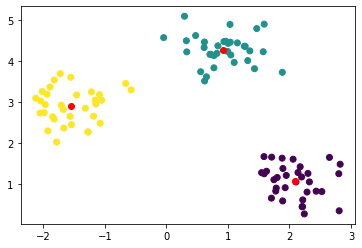

In [11]:
# Visualisation des clusters
plt.scatter(X[:,0], X[:,1], c = clusters_kmeans)
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], c='r')

In [12]:
# connaitre le nombre de variables explicatives
model_kmeans.n_features_in_

2

In [13]:
# connaitre le nombre de cluster
model_kmeans.n_clusters

3

In [14]:
# connaitre les centres
model_kmeans.cluster_centers_

array([[ 2.08889087,  1.07930405],
       [ 0.92702654,  4.27385438],
       [-1.55022199,  2.90542155]])

### Elbow Method

In [15]:
# Recherche du k optimal par la méthode du coude
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

C:\Users\Lewis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Cout du modele (Inertia)')

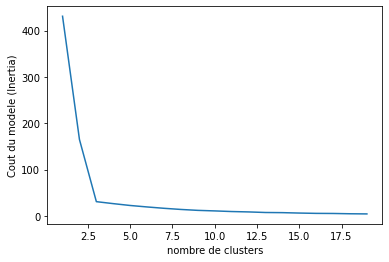

In [16]:
# Visualisation du coude
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

## 2. Detection d'anomalies avec Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# Générer les données
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

In [ ]:
# Création du modèle d'isolation Forest

model_isofo = IsolationForest(contamination=0.01)

anomalies = model_isofo.fit(X)

In [ ]:
# Clusters des anomalies
clusters_ano = anomalies.predict(X)

In [ ]:
# Visualisation des clusters des anomalies
plt.scatter(X[:,0], X[:, 1], c=clusters_ano)

### Application : Digits Outliers

In [ ]:
from sklearn.datasets import load_digits

# chargement des données

digits = load_digits()

In [ ]:
# récupérer des les images
images = digits.images

# variables explicatives oufeatures
X = digits.data

# Variables à expliquer ou Target
y = digits.target



In [ ]:
# Affichage d'une image
plt.imshow(images[7])

In [ ]:
model_isofo2 = IsolationForest(random_state=0, contamination=0.02)

ano = model_isofo2.fit(X)

outliers = ano.predict(X) == -1

outliers

In [ ]:
# compter les outliers
outliers1 = pd.DataFrame({'clusters':outliers})
outliers1['clusters'].value_counts()

In [ ]:

outliers_true = list(filter(lambda out: out == True, outliers))
outliers_true = np.array(outliers_true)
outliers_true

In [ ]:
plt.figure(figsize=(12, 3))
for i in range(20):
  plt.subplot(1, 20, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

## 2. PCA : Reduction de dimension

### Visualisation 2D

In [ ]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)

In [ ]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

In [ ]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(x_pca[i,0], x_pca[i,1], str(y[i]))

### Compression de données

In [ ]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')


In [ ]:
model = PCA(n_components=0.99)
model.fit(X)

In [ ]:
X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('originel')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressé')